In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Problem Statement:
- Given data about COVID-19 patients, write code to visualize the impact and
analyze the trend of rate of infection and recovery as well as make predictions
about the number of cases expected a week in future based on the current
trends.

#Dataset:
- CSV and Excel files containing data about the number of COVID-19 confirmed
deaths and recovered patients both around the world and in India. Download Link

# Guidelines:
- Use pandas to accumulate data from multiple data files.
- Use plotly (visualization library) to create interactive visualizations.
- Use Facebook prophet library to make time series models.
- Visualize the prediction by combining these technologies.

In [90]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data set/covid_19_clean_complete (1).csv')

In [91]:
df

Province/State         Country/Region        Lat       Long        Date  \
0                NaN            Afghanistan  33.939110  67.709953  2020-01-22   
1                NaN                Albania  41.153300  20.168300  2020-01-22   
2                NaN                Algeria  28.033900   1.659600  2020-01-22   
3                NaN                Andorra  42.506300   1.521800  2020-01-22   
4                NaN                 Angola -11.202700  17.873900  2020-01-22   
...              ...                    ...        ...        ...         ...   
49063            NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064            NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065            NaN                Comoros -11.645500  43.333300  2020-07-27   
49066            NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067            NaN                Lesotho -29.610000  28.233600  2020-07-27   

       Confirmed  Deaths  Recovered  Active             WHO Region  
0              0       0          0       0  Eastern Mediterranean  
1              0       0          0       0                 Europe  
2              0       0          0       0                 Africa  
3              0       0          0       0                 Europe  
4              0       0          0       0                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[49068 rows x 10 columns]

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [93]:
df['Date'] = pd.to_datetime(df['Date'])

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [95]:
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [96]:
df_date_country = df.groupby(['Date','Country/Region']).sum()

<ipython-input-96-d90a13319004>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [97]:
df_date_country_sorted = df_date_country.sort_values(by='Date')

In [98]:
df_date_country_sorted = df_date_country_sorted.reset_index()
df_date_country_sorted

Date Country/Region        Lat        Long  Confirmed  Deaths  \
0     2020-01-22    Afghanistan  33.939110   67.709953          0       0   
1     2020-01-22    Netherlands  94.865800 -196.721800          0       0   
2     2020-01-22    New Zealand -40.900600  174.886000          0       0   
3     2020-01-22      Nicaragua  12.865416  -85.207229          0       0   
4     2020-01-22          Niger  17.607789    8.081666          0       0   
...          ...            ...        ...         ...        ...     ...   
35151 2020-07-27        Georgia  42.315400   43.356900       1137      16   
35152 2020-07-27        Germany  51.165691   10.451526     207112    9125   
35153 2020-07-27          Ghana   7.946500   -1.023200      33624     168   
35154 2020-07-27       Eswatini -26.522500   31.465900       2316      34   
35155 2020-07-27       Zimbabwe -19.015438   29.154857       2704      36   

       Recovered  Active  
0              0       0  
1              0       0  
2              0       0  
3              0       0  
4              0       0  
...          ...     ...  
35151        922     199  
35152     190314    7673  
35153      29801    3655  
35154       1025    1257  
35155        542    2126  

[35156 rows x 8 columns]

In [99]:
countries = df_date_country_sorted['Country/Region'].unique()
countries

array(['Afghanistan', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger',
       'Nigeria', 'North Macedonia', 'Norway', 'Oman', 'Pakistan',
       'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines',
       'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Nepal',
       'Namibia', 'Mozambique', 'Morocco', 'Lebanon', 'Lesotho',
       'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg',
       'Madagascar', 'Malawi', 'Saint Kitts and Nevis', 'Malaysia',
       'Mali', 'Malta', 'Mauritania', 'Mauritius', 'Mexico', 'Moldova',
       'Monaco', 'Mongolia', 'Montenegro', 'Maldives', 'Latvia',
       'Saint Lucia', 'San Marino', 'Timor-Leste', 'Togo',
       'Trinidad and Tobago', 'Tunisia', 'Turkey', 'US', 'Uganda',
       'Ukraine', 'United Arab Emirates', 'United Kingdom', 'Uruguay',
       'Uzbekistan', 'Venezuela', 'Vietnam', 'West Bank and Gaza',
       'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe', 'Thailand',
       'Tanzania', 'Tajikistan', 'Taiwan*', 'S

<Axes: xlabel='Date', ylabel='Confirmed'>

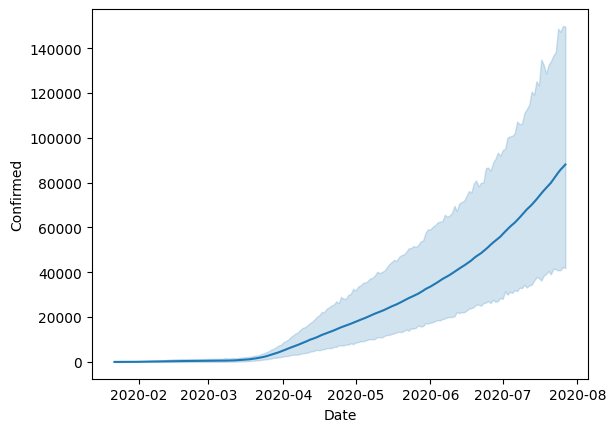

In [100]:
sns.lineplot(data =df_date_country_sorted, x = 'Date', y= 'Confirmed')

# 'Confirmed', 'Deaths', 'Recovered', 'Active' for a specific country from the above counties

In [101]:
import plotly.express as px

In [102]:
this_country = countries[15]
this_country

'Poland'

In [103]:
df_date_country_sorted_specific_country = df_date_country_sorted[df_date_country_sorted['Country/Region']==this_country]

fig = px.line(df_date_country_sorted_specific_country, x="Date", y= df.columns[5:9], title=f'For {this_country}')
fig.show()

In [104]:
df.columns[5:9]

Index(['Confirmed', 'Deaths', 'Recovered', 'Active'], dtype='object')

In [105]:
fig = px.line(df, x="Date", y= df.columns[5:9], title='Covid cases')
fig.show()

In [106]:
data_for_map = df.groupby('Country/Region')['Confirmed','Active','Deaths'].sum()
data_for_map = data_for_map.reset_index()
data_for_map

<ipython-input-106-0356cd3f7528>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Country/Region  Confirmed   Active  Deaths
0           Afghanistan    1936390  1089052   49098
1               Albania     196702    72117    5708
2               Algeria    1179755   345886   77972
3               Andorra      94404    19907    5423
4                Angola      22662    15011    1078
..                  ...        ...      ...     ...
182  West Bank and Gaza     233461   170967    1370
183      Western Sahara        901      190      63
184               Yemen      67180    25694   17707
185              Zambia     129421    43167    2643
186            Zimbabwe      50794    37706     881

[187 rows x 4 columns]

In [107]:
data_for_map[data_for_map['Country/Region']=='India']

Country/Region  Confirmed    Active   Deaths
79          India   40883464  15987913  1111831

In [108]:
fig = px.choropleth(data_for_map, locations='Country/Region', locationmode='country names', color='Deaths', hover_name='Country/Region', range_color=[1,10000], color_continuous_scale =None ,title='Active Cases Country')
fig.show()

In [109]:
df

Province/State         Country/Region        Lat       Long       Date  \
0                NaN            Afghanistan  33.939110  67.709953 2020-01-22   
1                NaN                Albania  41.153300  20.168300 2020-01-22   
2                NaN                Algeria  28.033900   1.659600 2020-01-22   
3                NaN                Andorra  42.506300   1.521800 2020-01-22   
4                NaN                 Angola -11.202700  17.873900 2020-01-22   
...              ...                    ...        ...        ...        ...   
49063            NaN  Sao Tome and Principe   0.186400   6.613100 2020-07-27   
49064            NaN                  Yemen  15.552727  48.516388 2020-07-27   
49065            NaN                Comoros -11.645500  43.333300 2020-07-27   
49066            NaN             Tajikistan  38.861000  71.276100 2020-07-27   
49067            NaN                Lesotho -29.610000  28.233600 2020-07-27   

       Confirmed  Deaths  Recovered  Active             WHO Region  
0              0       0          0       0  Eastern Mediterranean  
1              0       0          0       0                 Europe  
2              0       0          0       0                 Africa  
3              0       0          0       0                 Europe  
4              0       0          0       0                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[49068 rows x 10 columns]

In [110]:
df_active_cases = data_for_map.sort_values(by = 'Active', ascending = False )
df_active_cases = df_active_cases.head(20)
df_active_cases

Country/Region  Confirmed     Active    Deaths
173              US  224345948  156981121  11011411
23           Brazil   89524967   31094060   3938034
177  United Kingdom   26748587   22624595   3997775
138          Russia   45408411   19668578    619385
79            India   40883464   15987913   1111831
61           France   21210926   10980287   3048524
157           Spain   27404045    9277432   3033030
32           Canada    9356551    8656985    699566
132            Peru   19263916    7748957    652113
85            Italy   26745145    7363518   3707717
128        Pakistan   12833994    5633262    264729
154    South Africa   11168743    5150341    181979
13       Bangladesh    8754729    4924394    115633
120     Netherlands    5167516    4528235    622314
161          Sweden    4973160    4524247    448913
172          Turkey   17903345    4091900    466056
37         Colombia    6893122    3832786    236525
145    Saudi Arabia   12362961    3783704    105150
16          Belgium    6281116    3689945    963679
35            Chile   16935654    3320581    322480

Text(0.5, 1.0, 'Top 20 countries with active cases')

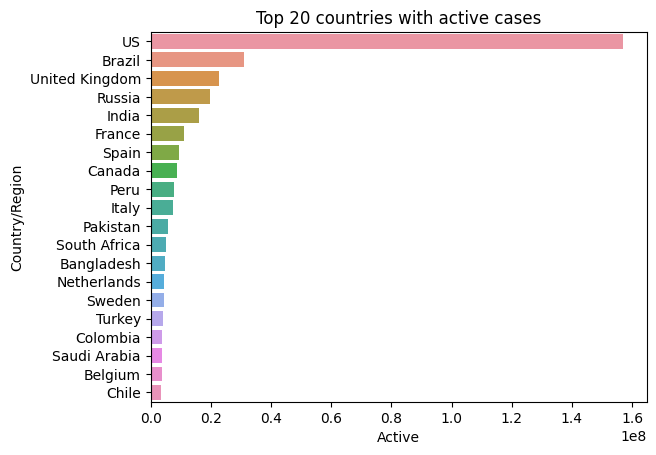

In [111]:

sns.barplot(y= df_active_cases['Country/Region'], x= df_active_cases['Active'] )
plt.title('Top 20 countries with active cases')

Text(0.5, 1.0, 'Top 20 countries with Confirmed cases')

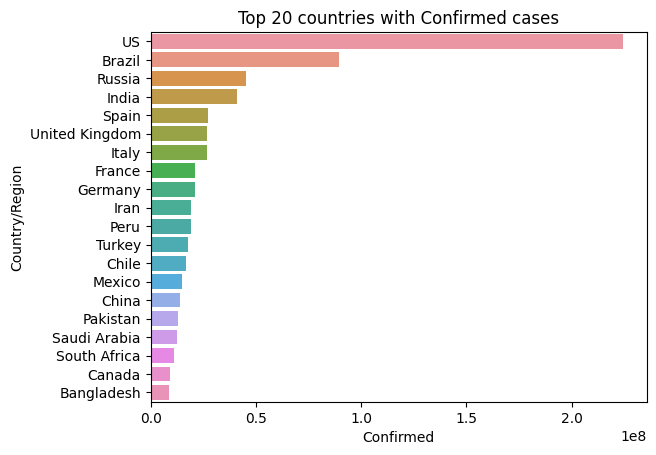

In [112]:
df_Confirmed_cases = data_for_map.sort_values(by = 'Confirmed', ascending = False )
df_Confirmed_cases = df_Confirmed_cases.head(20)
df_Confirmed_cases

sns.barplot(y= df_Confirmed_cases['Country/Region'], x= df_Confirmed_cases['Confirmed'] )
plt.title('Top 20 countries with Confirmed cases')

Text(0.5, 1.0, 'Top 20 countries with Death cases')

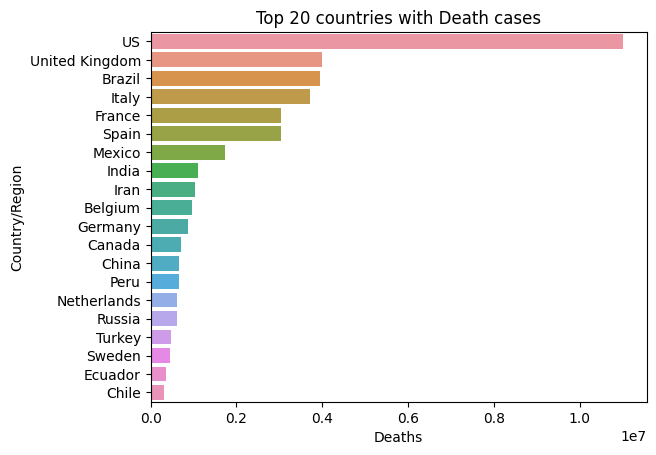

In [113]:
df_Death_cases = data_for_map.sort_values(by = 'Deaths', ascending = False )
df_Death_cases = df_Death_cases.head(20)
df_Death_cases

sns.barplot(y= df_Death_cases['Country/Region'], x= df_Death_cases['Deaths'] )
plt.title('Top 20 countries with Death cases')

In [115]:
from prophet import Prophet

In [116]:
data_for_prediction = df.groupby('Date').sum().reset_index()
data_for_prediction

<ipython-input-116-7df6c5816ca3>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Date         Lat         Long  Confirmed  Deaths  Recovered   Active
0   2020-01-22  5594.20365  6140.869714        555      17         28      510
1   2020-01-23  5594.20365  6140.869714        654      18         30      606
2   2020-01-24  5594.20365  6140.869714        941      26         36      879
3   2020-01-25  5594.20365  6140.869714       1434      42         39     1353
4   2020-01-26  5594.20365  6140.869714       2118      56         52     2010
..         ...         ...          ...        ...     ...        ...      ...
183 2020-07-23  5594.20365  6140.869714   15510481  633506    8710969  6166006
184 2020-07-24  5594.20365  6140.869714   15791645  639650    8939705  6212290
185 2020-07-25  5594.20365  6140.869714   16047190  644517    9158743  6243930
186 2020-07-26  5594.20365  6140.869714   16251796  648621    9293464  6309711
187 2020-07-27  5594.20365  6140.869714   16480485  654036    9468087  6358362

[188 rows x 7 columns]

In [117]:
df_date_country_sorted_specific_country = df_date_country_sorted_specific_country.reset_index()
df_date_country_sorted_specific_country

index       Date Country/Region      Lat     Long  Confirmed  Deaths  \
0       15 2020-01-22         Poland  51.9194  19.1451          0       0   
1      202 2020-01-23         Poland  51.9194  19.1451          0       0   
2      389 2020-01-24         Poland  51.9194  19.1451          0       0   
3      576 2020-01-25         Poland  51.9194  19.1451          0       0   
4      763 2020-01-26         Poland  51.9194  19.1451          0       0   
..     ...        ...            ...      ...      ...        ...     ...   
183  34236 2020-07-23         Poland  51.9194  19.1451      41580    1651   
184  34423 2020-07-24         Poland  51.9194  19.1451      42038    1655   
185  34609 2020-07-25         Poland  51.9194  19.1451      42622    1664   
186  34796 2020-07-26         Poland  51.9194  19.1451      43065    1671   
187  34984 2020-07-27         Poland  51.9194  19.1451      43402    1676   

     Recovered  Active  
0            0       0  
1            0       0  
2            0       0  
3            0       0  
4            0       0  
..         ...     ...  
183      31541    8388  
184      31997    8386  
185      32419    8539  
186      32753    8641  
187      32856    8870  

[188 rows x 9 columns]

In [118]:
data_for_prediction.drop(columns = ['Lat','Long'] ,inplace=True)

In [119]:
data_for_prediction # for all country combined

Date  Confirmed  Deaths  Recovered   Active
0   2020-01-22        555      17         28      510
1   2020-01-23        654      18         30      606
2   2020-01-24        941      26         36      879
3   2020-01-25       1434      42         39     1353
4   2020-01-26       2118      56         52     2010
..         ...        ...     ...        ...      ...
183 2020-07-23   15510481  633506    8710969  6166006
184 2020-07-24   15791645  639650    8939705  6212290
185 2020-07-25   16047190  644517    9158743  6243930
186 2020-07-26   16251796  648621    9293464  6309711
187 2020-07-27   16480485  654036    9468087  6358362

[188 rows x 5 columns]

In [120]:
df_date_country_sorted_specific_country_prediction_df = df_date_country_sorted_specific_country.iloc[:,[1,5,6,7,8]]
df_date_country_sorted_specific_country_prediction_df  #for poland

Date  Confirmed  Deaths  Recovered  Active
0   2020-01-22          0       0          0       0
1   2020-01-23          0       0          0       0
2   2020-01-24          0       0          0       0
3   2020-01-25          0       0          0       0
4   2020-01-26          0       0          0       0
..         ...        ...     ...        ...     ...
183 2020-07-23      41580    1651      31541    8388
184 2020-07-24      42038    1655      31997    8386
185 2020-07-25      42622    1664      32419    8539
186 2020-07-26      43065    1671      32753    8641
187 2020-07-27      43402    1676      32856    8870

[188 rows x 5 columns]

# for death toll prediciton

In [121]:
data_for_prediction_death = data_for_prediction[['Date', 'Deaths']]
data_for_prediction_death

Date  Deaths
0   2020-01-22      17
1   2020-01-23      18
2   2020-01-24      26
3   2020-01-25      42
4   2020-01-26      56
..         ...     ...
183 2020-07-23  633506
184 2020-07-24  639650
185 2020-07-25  644517
186 2020-07-26  648621
187 2020-07-27  654036

[188 rows x 2 columns]

ValueError: Dataframe must have columns "ds" and "y" with the dates and values respectively.

In [122]:
data_for_prediction_death = data_for_prediction_death.rename(columns={"Date": "ds", "Deaths": "y"})

In [123]:
data_for_prediction_death

ds       y
0   2020-01-22      17
1   2020-01-23      18
2   2020-01-24      26
3   2020-01-25      42
4   2020-01-26      56
..         ...     ...
183 2020-07-23  633506
184 2020-07-24  639650
185 2020-07-25  644517
186 2020-07-26  648621
187 2020-07-27  654036

[188 rows x 2 columns]

In [124]:
m = Prophet()
m.fit(data_for_prediction_death)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9b413n5e/r169m3ia.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9b413n5e/pnnaca2c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67711', 'data', 'file=/tmp/tmp9b413n5e/r169m3ia.json', 'init=/tmp/tmp9b413n5e/pnnaca2c.json', 'output', 'file=/tmp/tmp9b413n5e/prophet_modelh_g1e_g8/prophet_model-20231229133815.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:38:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:38:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [125]:
future = m.make_future_dataframe(periods = 14, freq = 'D')
future.tail()

ds
197 2020-08-06
198 2020-08-07
199 2020-08-08
200 2020-08-09
201 2020-08-10

In [126]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds           yhat     yhat_lower     yhat_upper
197 2020-08-06  698697.247613  694579.038020  703019.985749
198 2020-08-07  704212.246274  699289.972004  709220.910363
199 2020-08-08  709094.278919  703186.178237  714813.741530
200 2020-08-09  713231.196982  706882.542560  719579.804961
201 2020-08-10  717521.511362  710730.937762  724557.885285

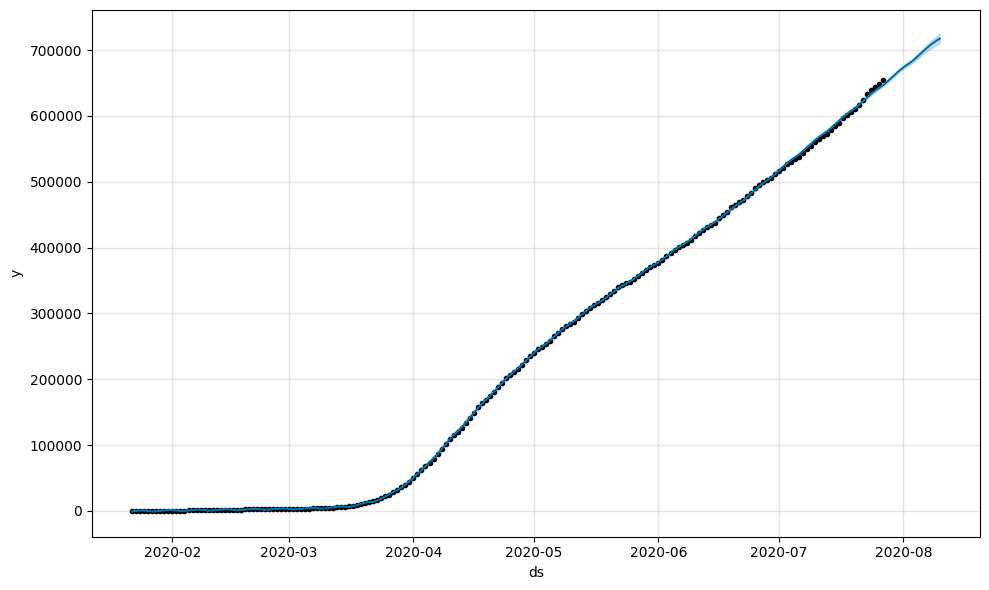

In [127]:
fig1 = m.plot(forecast)

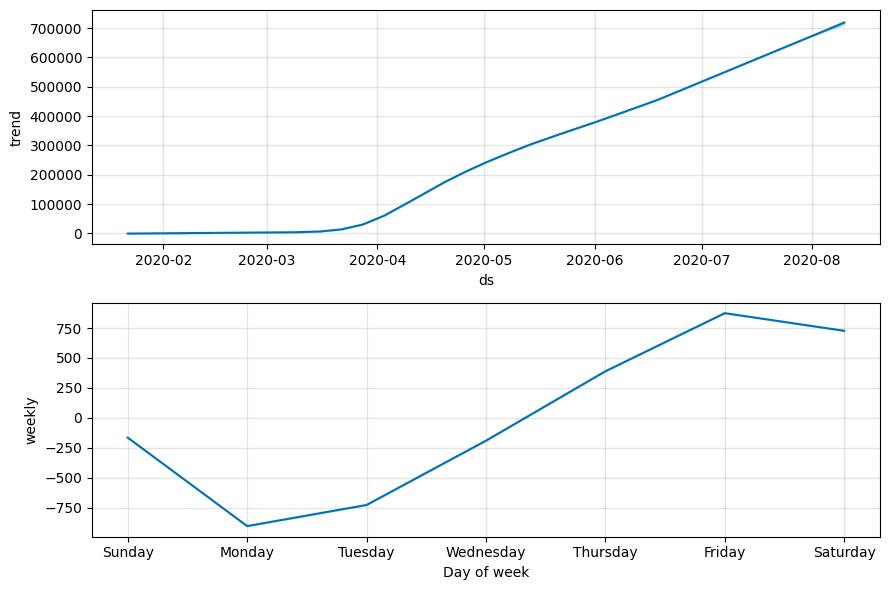

In [128]:
fig2 = m.plot_components(forecast)

In [129]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In 2 weeks the death toll is expected to be 700k,
Hence measures has to be taken to minimise death round the world

In [130]:
plot_components_plotly(m, forecast)

death toll For poland

In [131]:
for_prediction_country_df = df_date_country_sorted_specific_country_prediction_df.rename(columns={"Date": "ds", "Deaths": "y"})
m = Prophet()
m.fit(for_prediction_country_df)

future = m.make_future_dataframe(periods = 14, freq = 'D')
future.tail()

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9b413n5e/f8z9koka.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9b413n5e/064t0319.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16265', 'data', 'file=/tmp/tmp9b413n5e/f8z9koka.json', 'init=/tmp/tmp9b413n5e/064t0319.json', 'output', 'file=/tmp/tmp9b413n5e/prophet_modelm9q5zthw/prophet_model-20231229133818.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:38:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:38:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


ds         yhat   yhat_lower   yhat_upper
197 2020-08-06  1799.072566  1775.013563  1823.014069
198 2020-08-07  1808.980944  1783.590292  1835.482501
199 2020-08-08  1817.187024  1789.544856  1845.728729
200 2020-08-09  1823.521713  1790.799388  1856.200517
201 2020-08-10  1830.780344  1795.641282  1868.561331

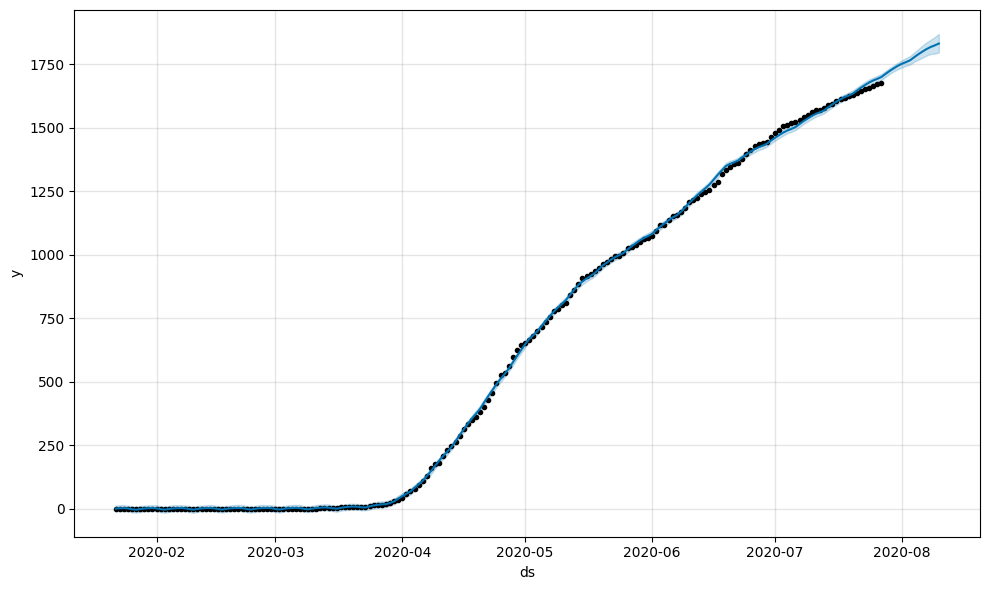

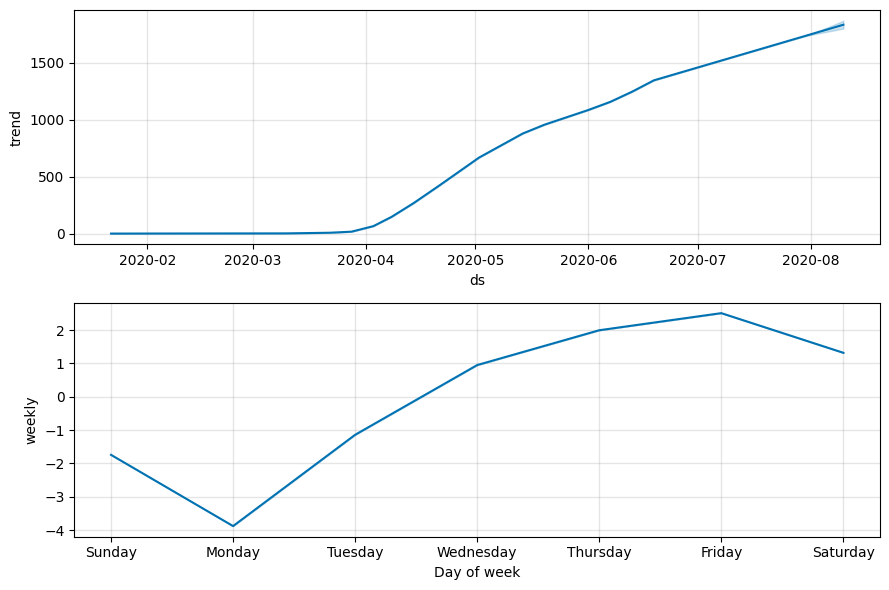

In [132]:
#forcast for poland death
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)
fig3 = plot_plotly(m, forecast)


In [133]:
fig4 = plot_components_plotly(m, forecast)
fig4

For further improvements we can make this into a funtion and give output for each countries

In [134]:
no_of_cases = data_for_prediction.iloc[:,[0,4]]
no_of_cases

Date   Active
0   2020-01-22      510
1   2020-01-23      606
2   2020-01-24      879
3   2020-01-25     1353
4   2020-01-26     2010
..         ...      ...
183 2020-07-23  6166006
184 2020-07-24  6212290
185 2020-07-25  6243930
186 2020-07-26  6309711
187 2020-07-27  6358362

[188 rows x 2 columns]

In [135]:
no_of_cases = no_of_cases.rename(columns={"Date": "ds", "Deaths": "y"})
m = Prophet()
m.fit(for_prediction_country_df)

future = m.make_future_dataframe(periods = 14, freq = 'D')
future.tail()

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9b413n5e/ek0l64u9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9b413n5e/e70hcqxr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68256', 'data', 'file=/tmp/tmp9b413n5e/ek0l64u9.json', 'init=/tmp/tmp9b413n5e/e70hcqxr.json', 'output', 'file=/tmp/tmp9b413n5e/prophet_model142ykml3/prophet_model-20231229133821.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:38:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:38:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


ds         yhat   yhat_lower   yhat_upper
197 2020-08-06  1799.072566  1775.045157  1821.694247
198 2020-08-07  1808.980944  1783.174979  1832.858942
199 2020-08-08  1817.187024  1788.289247  1845.402263
200 2020-08-09  1823.521713  1790.930511  1853.330237
201 2020-08-10  1830.780344  1795.031238  1865.161149

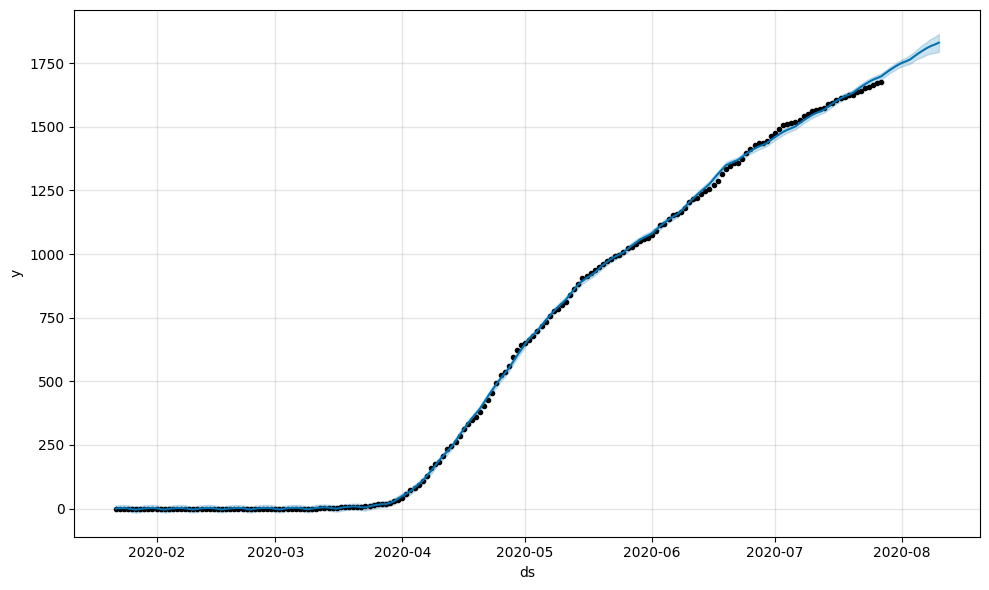

In [139]:
#forcast for number of cases around the world
fig1 = m.plot(forecast)

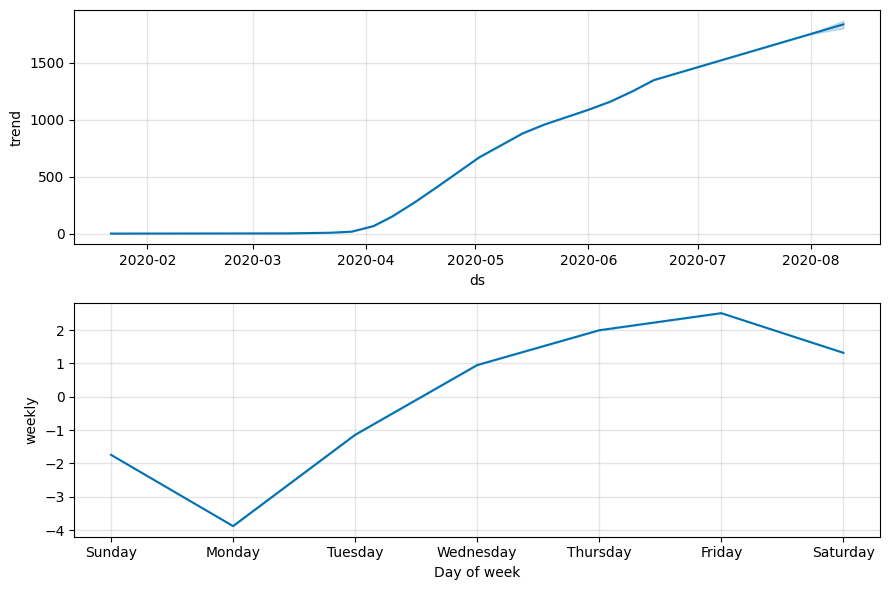

In [140]:
fig2 = m.plot_components(forecast)
fig3 = plot_plotly(m, forecast)

In [137]:
fig4 = plot_components_plotly(m, forecast)
fig4

In [138]:
 help(Prophet)

Help on class Prophet in module prophet.forecaster:

class Prophet(builtins.object)
 |  Prophet(growth='linear', changepoints=None, n_changepoints=25, changepoint_range=0.8, yearly_seasonality='auto', weekly_seasonality='auto', daily_seasonality='auto', holidays=None, seasonality_mode='additive', seasonality_prior_scale=10.0, holidays_prior_scale=10.0, changepoint_prior_scale=0.05, mcmc_samples=0, interval_width=0.8, uncertainty_samples=1000, stan_backend=None, scaling: str = 'absmax', holidays_mode=None)
 |  
 |  Prophet forecaster.
 |  
 |  Parameters
 |  ----------
 |  growth: String 'linear', 'logistic' or 'flat' to specify a linear, logistic or
 |      flat trend.
 |  changepoints: List of dates at which to include potential changepoints. If
 |      not specified, potential changepoints are selected automatically.
 |  n_changepoints: Number of potential changepoints to include. Not used
 |      if input `changepoints` is supplied. If `changepoints` is not supplied,
 |      then n_